## 1) INSPIRE API

### a) 

In [43]:
import requests
import json

#GET universities via REST API request to Inspire
response = requests.get("https://inspirehep.net/api/institutions?q=italy")
list_of_institutions = response.json().get("hits").get("hits")

#Get legacy_ICN of the first university with at least 1 paper published
for institution in list_of_institutions:
    if institution.get("metadata").get("number_of_papers") > 0:
        legacy_ICN = institution.get("metadata").get("legacy_ICN")
        break
    print("All universities in this country have 0 papers! please query another country")

CNR, Italy
INFN, Italy
INFM, Italy (main)
Unlisted, IT
PRATO, Italy
Digital Italia, Rome
Hudson Italiana, Milan
GCTP Renaio, Lucca
ASI-CGS, Matera
ASI-CGS, Matera


### b) // c)

Profe, intenté conectar el numeral anterior con este punto pero la API requiere el input del parametro aff de una forma demasiado especifica, por ahora trabajaré con el ejemplo de la UNALque usted usó

In [75]:
from random import randint

response = requests.get("https://inspirehep.net/api/literature?sort=mostrecent&page=1&q=aff+Colombia,+U.+Natl.+and+ac+1-%3E+10")
list_of_papers = response.json().get("hits").get("hits")

#these values were selected randomly by a human! (me)
n1=9
n2=6

authors_papers_1 = list_of_papers[n1].get("metadata").get("authors")
authors_papers_2 = list_of_papers[n2].get("metadata").get("authors")

all_authors = authors_papers_1 + authors_papers_2

authors_refs = []
for author in all_authors:
    authors_refs.append(author.get("record").get("$ref"))

print(authors_refs)




['https://inspirehep.net/api/authors/1964576', 'https://inspirehep.net/api/authors/1964574', 'https://inspirehep.net/api/authors/1985776', 'https://inspirehep.net/api/authors/2072990', 'https://inspirehep.net/api/authors/2072991', 'https://inspirehep.net/api/authors/2072992', 'https://inspirehep.net/api/authors/2072993', 'https://inspirehep.net/api/authors/2072994']


### d) 

In [91]:
import pandas as pd

#Profe, hay un problema con el API, para estos autores solo trae info de su nombre, no trae info de nada mas!!
#puede verificiarlo buscando uno de los autores manualmente
#Construire la tabla aunque no tenga los otros valores
authors_table = []
for ref in authors_refs:
    response = requests.get(ref)
    author = response.json()
    
    name = author.get("metadata").get("name").get("value")
    email = author.get("metadata").get("email_adresses")
    # Aqui irian los otros valores... si se encontran en el API
    
    author_to_append = {"name":name,"email":email}
    authors_table.append(author_to_append)

pd.DataFrame(authors_table)
    

,name,email
0,"Vargas-Calderón, Vladimir",None
1,"González, Fabio A.",None
2,"Vinck-Posada, Herbert",None
3,"Vivas, David R.",None
4,"Madroñero, Javier",None
5,"Bucheli, Victor",None
6,"Gómez, Luis O.",None
7,"Reina, John H.",None


## 2)

### a)

In [105]:
#10072234... 78 <--- ultimos dos numeros de mi cedula

import random
import numpy as np

#We find three random roots between 7 and 8
roots = []
for i in range(0,3):
    roots.append(random.uniform(7,8))
print("roots =",roots)

#now, we generate the polynomial
coefs = np.polynomial.polynomial.polyfromroots(roots)

p = np.poly1d(coefs)
print("\n",p)

roots = [7.442583810481713, 7.740200182996348, 7.34463121282632]

         3         2
-423.1 x + 169.1 x - 22.53 x + 1


### b)

In [115]:
dp = np.polyder(p)
print("Derivada:\n",dp,"\n")
print("Puntos criticos:\n\n",np.roots(dp))

Derivada:
        2
-1269 x + 338.2 x - 22.53 

Puntos criticos:

 [0.13532307 0.13115123]


### d)

-165227.18137172292
-186242.9065092425
-158673.16931967446


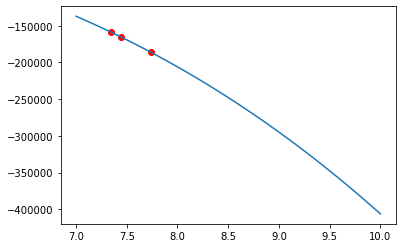

In [123]:
import matplotlib.pyplot as plt

xAxis = np.linspace(7,10)

for root in roots:
    print(np.polyval(p,root))
    plt.plot(root,np.polyval(p,root),"ro")

y = p(xAxis)
plt.plot(xAxis, y)
plt.show()